# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [4]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [5]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [6]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [7]:
# revisar el número de filas y columnas de cada dataset
print("plans:", plans.shape)
print("users:", users.shape)
print("usage:", usage.shape)

plans: (2, 8)
users: (4000, 8)
usage: (40000, 6)


In [8]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [9]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [10]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [16]:
# cantidad de nulos para users
print("--- Valores nulos en USERS ---")
print("Cantidad:")
print(users.isna().sum())
print("\nProporción:")
print(users.isna().mean())


--- Valores nulos en USERS ---
Cantidad:
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporción:
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [17]:
# cantidad de nulos para usage
print("--- Valores nulos en USAGE ---")
print("Cantidad:")
print(usage.isna().sum())
print("\nProporción:")
print(usage.isna().mean())

--- Valores nulos en USAGE ---
Cantidad:
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Proporción:
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

Diagnóstico de Calidad de Datos:

* Dataset: users

churn_date (88.35% de nulos): Ignorar / Mantener como están. Es un comportamiento normal; los nulos indican que el cliente sigue activo en ConnectaTel, por lo que no debemos eliminarlos ni imputarlos con fechas falsas.

city (11.72% de nulos): Investigar e Imputar. Al ser un porcentaje moderado, se recomienda llenar estos espacios con el valor "Desconocida" o intentar recuperarlos si el user_id aparece con ciudad en otros registros, para no perder el análisis geográfico.

* Dataset: usage
  
date (0.12% de nulos): Eliminar o Ignorar. La proporción es ínfima (menos del 1%); eliminar estas pocas filas no afectará la integridad estadística del análisis global.

duration (55.19% de nulos): Imputar con 0 o Investigar. Probablemente son nulos porque el registro corresponde a un mensaje (SMS) y no a una llamada; si el type es SMS, la duración debe ser 0.

length (44.74% de nulos): Imputar con 0 o Investigar. Similar a la duración, si el registro es una llamada, no tiene "longitud" de mensaje (caracteres), por lo que el nulo debería tratarse como 0.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [18]:
# explorar columnas numéricas de users
print("Resumen estadístico de USERS:")
display(users.describe())

Resumen estadístico de USERS:


,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` ... Haz doble clic en este bloque y escribe qué ves.
  Para la columna user_id Se observa una distribución uniforme. El rango va desde 10,000 hasta 13,999, lo que suma los 4,000 registros totales. La media y la mediana (50%) son idénticas (11,999.5), lo que confirma que es una clave primaria íntegra sin valores duplicados ni saltos extraños. No presenta problemas.
- La columna `age` ...
  Para la columna age se detecta un sentinel (valor inválido) crítico. El valor mínimo es -999, lo cual es biológicamente imposible. Además, se nota que la mediana es 47 pero la media baja a 33.7 debido a la influencia de estos valores negativos. Esto indica que se usó "-999" para representar datos faltantes o errores de captura. El valor máximo de 79 años parece perfectamente normal para el perfil de un cliente.

In [19]:
# explorar columnas numéricas de usage
print("\nResumen estadístico de USAGE:")
display(usage.describe())


Resumen estadístico de USAGE:


,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.

* La columna id: Es un identificador correlativo simple. Va del 1 al 40,000, lo que coincide con el conteo total de filas (count). No presenta anomalías; funciona como una llave primaria para cada evento de uso.

* La columna user_id: Los valores están entre 10,000 y 13,999, lo que confirma que los datos de consumo están alineados con los IDs de la tabla de usuarios. Es la columna usada para unir las tablas en pasos posteriores.

* La columna duration (Llamadas): Se observa que solo hay 17,924 registros no nulos (de los 40,000 totales). La media es de 5.2 minutos, pero hay un máximo de 120 minutos. El mínimo de 0.0, asociado a un parámetro común en telecomunicaciones, que representa llamadas perdidas o que no fueron contestadas.

* La columna length (Mensajes): Tiene 22,104 registros no nulos. El promedio es de 52 caracteres, lo cual es estándar para un mensaje de texto. Sin embargo, el valor máximo de 1,490 es muy alto para un solo mensaje; esto podría ser un mensaje muy largo segmentado o un comportamiento atípico que vale la pena observar.

In [20]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']

for col in columnas_user:
    print(f"--- Valores únicos en la columna: {col} ---")
    print(users[col].unique())
    print(f"\nConteo de frecuencia para {col}:")
    print(users[col].value_counts())
    print("\n" + "="*40 + "\n")


--- Valores únicos en la columna: city ---
['Medellín' '?' 'CDMX' 'Bogotá' 'GDL' 'MTY' nan 'Cali']

Conteo de frecuencia para city:
Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64


--- Valores únicos en la columna: plan ---
['Basico' 'Premium']

Conteo de frecuencia para plan:
Basico     2595
Premium    1405
Name: plan, dtype: int64




- La columna `city`:
  * Presencia de "Sentinels": Se detectó el carácter '?' en 96 registros. Al igual que el   -999 en la edad, este es un valor usado para indicar datos desconocidos.

  * Valores Nulos: Se confirman los valores nan vistos anteriormente (11.7% del total).

  * Distribución: La mayoría de los usuarios se concentran en las capitales principales (Bogotá, CDMX y Medellín).

  * Acción: Debería unificarse el '?' con los nan y etiquetarlos a ambos como "Desconocida" u "Other", para concretar una categoría limpia.
 
    
- La columna `plan`:

   * Se evidencia que esta columna está perfectamente limpia. Solo existen dos valores: 'Basico' y 'Premium'.
     
   * Distribución de Mercado: El plan Basico es el más popular, representando aproximadamente el 65% de la base de usuarios ($2595 \text{ de } 4000$), mientras que el Premium ocupa el 35% restante. No aparecen errores de escritura ni valores extraños.

In [22]:
# explorar columna categórica de usage
print("Valores únicos en la columna 'type':")
print(usage['type'].unique())
print("\nConteo de frecuencia por tipo de uso:")
print(usage['type'].value_counts())

Valores únicos en la columna 'type':
['call' 'text']

Conteo de frecuencia por tipo de uso:
text    22092
call    17908
Name: type, dtype: int64


La columna `type`:

* Se evidencian dos actividades principales: text (mensajes) y call (llamadas). No se observan valores extraños ni errores de captura (como "sms" o "llamad"), lo cual es excelente.

* Hay una ligera tendencia hacia el uso de mensajes de texto (22,092) frente a las llamadas (17,908). Esto representa una proporción de aproximadamente 55% texto y 45% voz.

* Los 17,908 registros de call coinciden casi exactamente con los valores no nulos que se aprecian en la columna duration.

* Los 22,092 registros de text coinciden con los valores no nulos de length.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

He identificado valores inconsistentes y "sentinels" (códigos que representan datos faltantes) en los siguientes puntos:

1. En el dataset users:
Columna age: Se detectó el valor -999 como valor mínimo. Claramente es un "sentinel" para datos no registrados, ya que es una edad imposible.

Acción: Reemplazar los valores -999 por la mediana de la edad de los usuarios para no sesgar el análisis estadístico.

Columna city: Se detectó el carácter '?' como un valor frecuente (96 casos). Al igual que los nulos (NaN), este valor indica una ubicación desconocida.

Acción: Unificar tanto los '?' como los NaN bajo la etiqueta "Desconocida" para poder mantener estos registros en el análisis sin perder información de otras columnas.

2. En el dataset usage:
Columnas duration y length: Presentan una gran cantidad de valores nulos (alrededor del 45-55%). No son errores, sino que dependen del valor en la columna type.

Acción: Imputar con 0 los valores nulos en duration cuando el tipo sea 'text', y en length cuando el tipo sea 'call'.

Columna duration: El valor 0.0 en llamadas (mínimo) es un comportamiento esperado que representa llamadas no completadas o perdidas.

Acción: Mantener estos valores, ya que reflejan un intento de uso del servicio.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [23]:

# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')


In [24]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

In [25]:
# Revisar los años presentes en `reg_date` de users
print("Frecuencia de años en reg_date (Users):")
print(users['reg_date'].dt.year.value_counts().sort_index())

Frecuencia de años en reg_date (Users):
2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64


En `reg_date`, ... haz doble clic en este bloque y escribe qué ves.

Se evidencia lo siguiente:

* Presencia de Años Futuros: Se observa que existen 40 registros con el año 2026. Dado que el enunciado del proyecto establece claramente que se trabaja con información registrada hasta el año 2024, estos datos son cronológicamente imposibles y representan un error de captura o inconsistencia en el dataset.

* Distribución Temporal: Los años 2022, 2023 y 2024 presentan una distribución muy equilibrada, con aproximadamente 1,300 registros cada uno, lo que sugiere un crecimiento estable de usuarios en esos periodos.

* Acción recomendada: Estos 40 registros del año 2026 deben ser tratados como valores inválidos. Se recomienda eliminarlos o, de ser posible, investigar si corresponden a un error de digitación (por ejemplo, que en realidad fueran 2024). Al ser una cantidad pequeña (1% de los datos), eliminarlos no afectará la validez estadística del análisis.

In [26]:
# Revisar los años presentes en `date` de usage
print("Frecuencia de años en la columna 'date' (Usage):")
print(usage['date'].dt.year.value_counts().sort_index())


Frecuencia de años en la columna 'date' (Usage):
2024.0    39950
Name: date, dtype: int64


En `date`, ... haz doble clic en este bloque y escribe qué ves.  
Basaremos el análisis en estas fechas.

* Se observa que la gran mayoría de los registros (39,950) pertenecen exclusivamente al año 2024. A diferencia del dataset de usuarios, aquí no aparecen registros del año 2026, lo que significa que el error de captura no se propagó a la tabla de consumos.

* Valores Faltantes: Dado que el dataset original de usage tenía 40,000 filas, la diferencia (50 registros) corresponde a los valores nulos que se identificaron anteriormente, los cuales ahora aparecen como NaT (Not a Time).

* Al estar los datos de consumo concentrados en el 2024, este debe ser el "año de estudio" principal. Los 50 registros sin fecha representan apenas el 0.12% del dataset, por lo que su exclusión no afectará los resultados finales del perfil estadístico.


✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

Al analizar la temporalidad de los datos registrados hasta 2024, he detectado lo siguiente:

En el dataset users:

* Hallazgo: Se identificaron 40 registros con el año 2026 en la columna reg_date. Dado que el contexto del proyecto indica que la información llega hasta el año 2024, estas fechas son "imposibles" (futuras al momento del cierre de los datos).

* Acción recomendada: Eliminar los 40 registros. Al representar solo el 1% de la base de usuarios y ser datos cronológicamente inconsistentes, es mejor descartarlos para no sesgar el análisis de antigüedad o registros anuales.

En el dataset usage:

* Hallazgo: La columna date es consistente, mostrando que la totalidad de los consumos registrados (39,950 filas con fecha) corresponden al año 2024. No se detectaron años futuros ni años excesivamente antiguos.

* Acción recomendada: Mantener los datos de 2024 y simplemente descartar las 50 filas con valores nulos (NaT) detectadas previamente, ya que su peso estadístico no es representativo (0.12%).

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [27]:
# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [28]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
print("Valores nulos en city tras limpieza:")
print(users['city'].isna().sum())

Valores nulos en city tras limpieza:
565


In [31]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT

# Verificar cambios
print("Conteo de años en reg_date tras limpieza:")
print(users['reg_date'].dt.year.value_counts().sort_index())

Conteo de años en reg_date tras limpieza:
2022.0    1314
2023.0    1316
2024.0    1330
Name: reg_date, dtype: int64


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [32]:
# Verificación MAR en usage (Missing At Random) para duration
print("Distribución de nulos en 'duration' por tipo de servicio:")
print(usage[usage['duration'].isna()]['type'].value_counts())

Distribución de nulos en 'duration' por tipo de servicio:
text    22076
Name: type, dtype: int64


In [33]:
# Verificación MAR en usage (Missing At Random) para length
print("Distribución de nulos en 'length' por tipo de servicio:")
print(usage[usage['length'].isna()]['type'].value_counts())

Distribución de nulos en 'length' por tipo de servicio:
call    17896
Name: type, dtype: int64


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

Tras el análisis de correlación entre las columnas, los resultados confirman lo siguiente:

* Identificación del patrón (MAR): Los valores nulos son Missing At Random (MAR), ya que su ausencia no es accidental ni fruto de un error de carga, sino que depende estrictamente de la naturaleza del servicio en la columna type.

* En duration: El 100% de los valores nulos corresponden a registros de tipo 'text'. Esto es lógico, ya que un mensaje de texto no tiene una duración en minutos.

* En length: El 100% de los valores nulos corresponden a registros de tipo 'call'. Esto se debe a que las llamadas de voz no poseen una longitud de caracteres de texto.

* Acción recomendada: Se deberían mantener los nulos o tratarlos como 0 para operaciones matemáticas específicas. No deben eliminarse porque cada fila representa un evento de consumo real. Al dejarlos como nulos o ceros, se evita que los mensajes afecten el cálculo del promedio de duración de las llamadas, y viceversa, manteniendo la integridad estadística de cada servicio por separado.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [34]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',
    'is_call': 'sum',
    'duration': 'sum'
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [35]:
# Renombrar columnas
usage_agg.columns = ['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [36]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on='user_id', how='left') 
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [37]:
# Resumen estadístico de las columnas numéricas
cols_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
print("Resumen estadístico de usuarios:")
display(user_profile[cols_numericas].describe())

Resumen estadístico de usuarios:


,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [38]:
# Distribución porcentual del tipo de plan
print("\nDistribución porcentual por tipo de plan:")
dist_planes = user_profile['plan'].value_counts(normalize=True) * 100
print(dist_planes.map("{:.2f}%".format))


Distribución porcentual por tipo de plan:
Basico     64.88%
Premium    35.12%
Name: plan, dtype: object


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

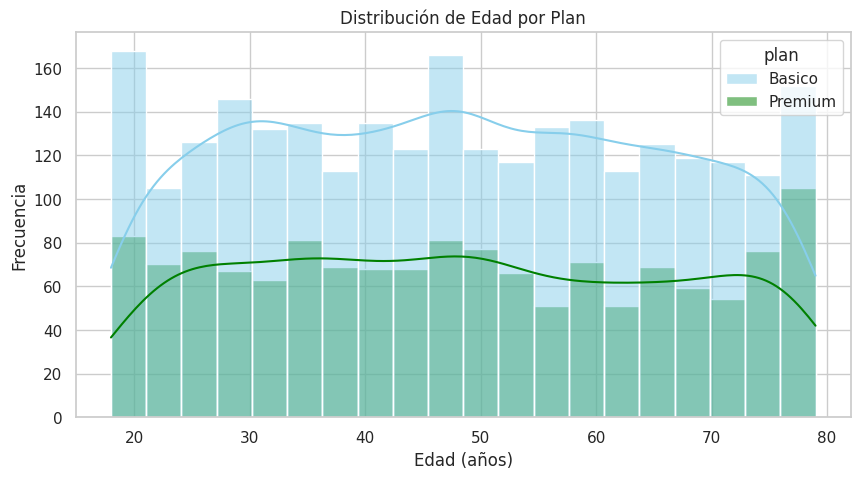

In [41]:
sns.set_theme(style="whitegrid")
colores = {'Basico': 'skyblue', 'Premium': 'green'}


# Histograma para visualizar la edad (age)
plt.figure(figsize=(10, 5))
sns.histplot(data=user_profile, x='age', hue='plan', palette=colores, kde=True, bins=20)
plt.title('Distribución de Edad por Plan')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Distribución: La distribución es simétrica/uniforme. No parece haber una preferencia de plan según la edad.

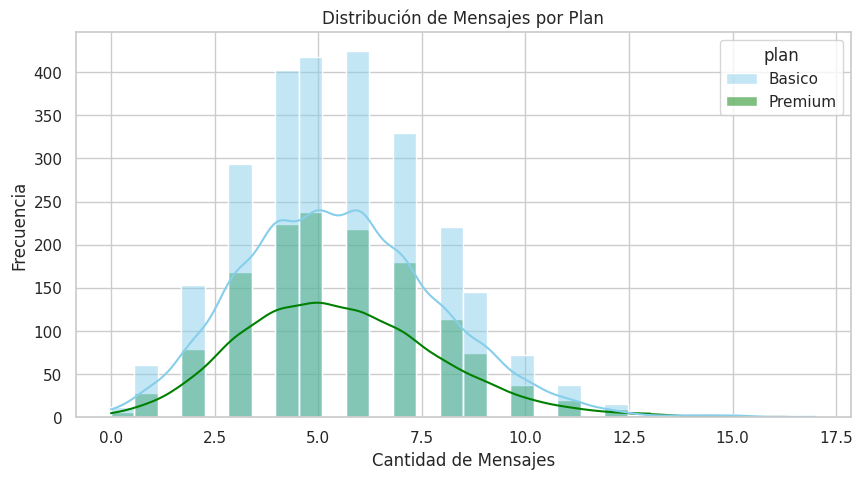

In [42]:
# Histograma para visualizar la cant_mensajes
plt.figure(figsize=(10, 5))
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', palette=colores, kde=True, bins=30)
plt.title('Distribución de Mensajes por Plan')
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Tiene una distribución sesgada a la derecha. Los usuarios de ambos planes tienden a enviar pocos mensajes, pero el plan Premium tiene una cola más larga.

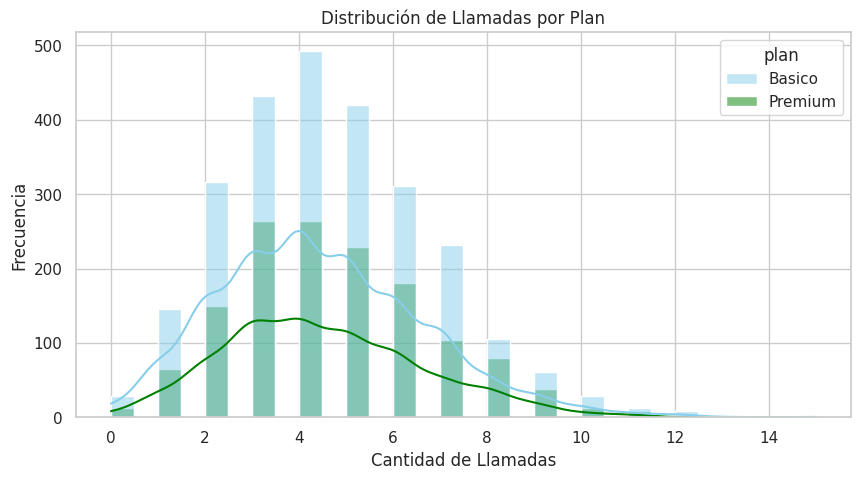

In [43]:
# Histograma para visualizar la cant_llamadas
plt.figure(figsize=(10, 5))
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', palette=colores, kde=True, bins=30)
plt.title('Distribución de Llamadas por Plan')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Distribución: Los usuarios del plan Básico tienden a concentrarse en el rango bajo, mientras que los Premium tienen una distribución más aplanada y dispersa.

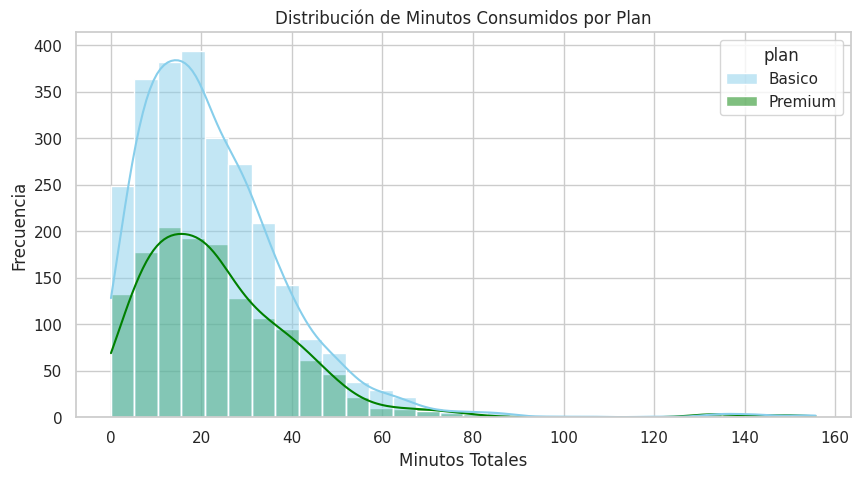

In [44]:
# Histograma para visualizar la cant_minutos_llamada
plt.figure(figsize=(10, 5))
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', palette=colores, kde=True, bins=30)
plt.title('Distribución de Minutos Consumidos por Plan')
plt.xlabel('Minutos Totales')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Distribución sesgada a la derecha. Existe un grupo considerable de usuarios del plan Básico que consumen una cantidad de minutos similar a los Premium

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

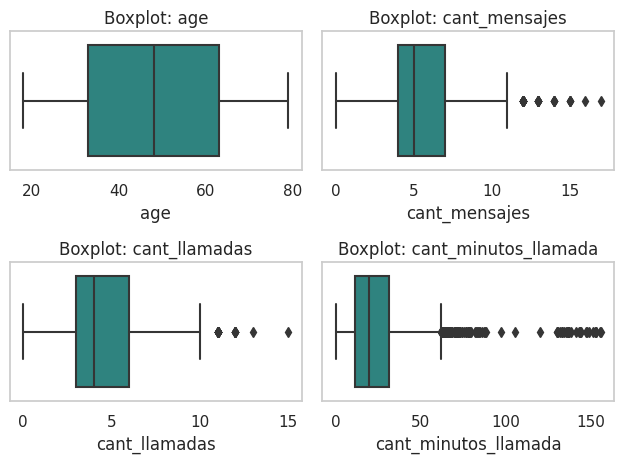

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=user_profile[col], palette='viridis')
    plt.title(f'Boxplot: {col}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

💡Insights: 
- Age: En términos generales, no presenta outliers. La edad suele estar bien distribuida entre 18 y 80 años sin valores que se disparen.
- cant_mensajes: Presenta outliers en la parte superior. Hay usuarios que casi no usan SMS y un pequeño grupo que envía cientos.
- cant_llamadas: Presenta algunos outliers superiores, indicando usuarios con un uso de llamadas muy por encima del promedio.
- cant_minutos_llamada: Presenta outliers superiores. Reflejan usuarios con un tiempo de consumo muy por encima del promedio del mercado

In [46]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
limites = {}

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    limites[col] = (max(0, limite_inferior), limite_superior)
    
    print(f"Columna: {col}")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Límite Superior (Outlier >): {limite_superior:.2f}")


Columna: cant_mensajes
  Q1: 4.00, Q3: 7.00, IQR: 3.00
  Límite Superior (Outlier >): 11.50
Columna: cant_llamadas
  Q1: 3.00, Q3: 6.00, IQR: 3.00
  Límite Superior (Outlier >): 10.50
Columna: cant_minutos_llamada
  Q1: 11.12, Q3: 31.41, IQR: 20.30
  Límite Superior (Outlier >): 61.86


In [47]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
resumen = user_profile[columnas_limites].describe()

for col in columnas_limites:
    resumen.loc['limite_superior_IQR', col] = limites[col][1]

print("Comparativa de Estadísticos vs Límites de Outliers:")
display(resumen.loc[['mean', '50%', 'max', 'limite_superior_IQR']])

Comparativa de Estadísticos vs Límites de Outliers:


,cant_mensajes,cant_llamadas,cant_minutos_llamada
mean,5.524381,4.47812,23.317054
50%,5.000000,4.00000,19.780000
max,17.000000,15.00000,155.690000
limite_superior_IQR,11.500000,10.50000,61.857500


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué?
- cant_llamadas: mantener o no outliers, porqué?
- cant_minutos_llamada: mantener o no outliers, porqué?

1. cant_mensajes: Mantener
¿Por qué?: En la era de la mensajería instantánea (WhatsApp/Telegram), el uso de SMS ha quedado relegado a un nicho pequeño o a usos específicos (notificaciones bancarias, seguridad, etc.). Los usuarios que envían muchos mensajes no son "errores", sino que representan un comportamiento real de consumo que, aunque atípico para el promedio, es físicamente posible y facturable si exceden el límite de su plan.

2. cant_llamadas: Mantener
¿Por qué?: El número de llamadas es un indicador de la actividad del cliente. Un número alto de llamadas (outlier) suele estar correlacionado con un alto número de minutos. Mantenerlos es vital para entender el perfil de los clientes "comerciales" o "altamente conectados" que forman parte de la base real de ConnectaTel.

3. cant_minutos_llamada: Mantener
¿Por qué?: Esta es la variable con mayor impacto financiero. Los outliers en minutos representan a los clientes que más probablemente excederán los límites de su plan (especialmente en el plan Básico), generando ingresos adicionales por cargos excedentes. Si eliminamos estos datos, subestimaríamos los ingresos potenciales y no podríamos identificar correctamente a los candidatos ideales para un upgrade al plan Premium.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [48]:
import numpy as np

condiciones = [
    (user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5), # Bajo uso
    (user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10) # Uso medio
]

opciones = ['Bajo uso', 'Uso medio']
# Crear columna grupo_uso
user_profile['grupo_uso'] = np.select(condiciones, opciones, default='Alto uso')

In [49]:
# verificar cambios
print("Distribución de los grupos de uso:")
print(user_profile['grupo_uso'].value_counts())
user_profile.head()

Distribución de los grupos de uso:
Uso medio    2943
Bajo uso      778
Alto uso      279
Name: grupo_uso, dtype: int64


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [50]:
# Crear columna grupo_edad

condiciones_edad = [
    (user_profile['age'] < 30),                 # Joven
    (user_profile['age'] >= 30) & (user_profile['age'] < 60) # Adulto
]

opciones_edad = ['Joven', 'Adulto']

# Asignamos 'Adulto Mayor' por defecto para los que tienen 60 o más años
user_profile['grupo_edad'] = np.select(condiciones_edad, opciones_edad, default='Adulto Mayor')




In [51]:
# verificar cambios
# Verificar los cambios y la distribución de los grupos
print("Distribución de los grupos de edad:")
print(user_profile['grupo_edad'].value_counts())
# Observar resultado
user_profile.head()

Distribución de los grupos de edad:
Adulto          2018
Adulto Mayor    1222
Joven            760
Name: grupo_edad, dtype: int64


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

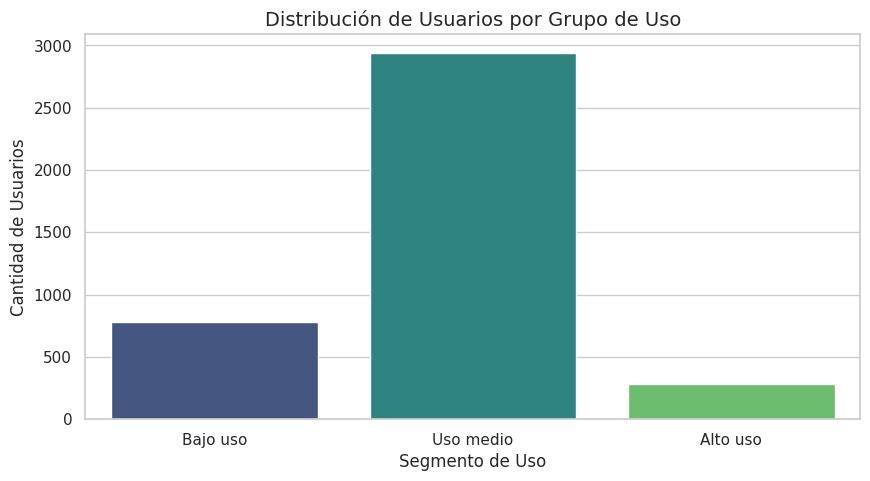

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_theme(style="whitegrid")

# Visualización de los segmentos por uso
plt.figure(figsize=(10, 5))
# Usamos order para que las barras tengan una secuencia lógica
order_uso = ['Bajo uso', 'Uso medio', 'Alto uso']
sns.countplot(data=user_profile, x='grupo_uso', palette='viridis', order=order_uso)

plt.title('Distribución de Usuarios por Grupo de Uso', fontsize=14)
plt.xlabel('Segmento de Uso')
plt.ylabel('Cantidad de Usuarios')
plt.show()

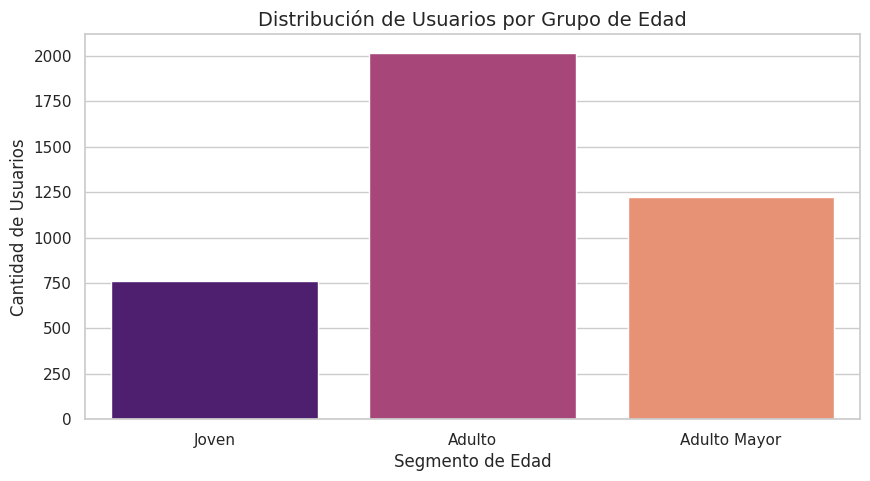

In [54]:
# Visualización de los segmentos por edad
plt.figure(figsize=(10, 5))
# Usamos order para mostrar el ciclo de vida de joven a adulto mayor
order_edad = ['Joven', 'Adulto', 'Adulto Mayor']
sns.countplot(data=user_profile, x='grupo_edad', palette='magma', order=order_edad)

plt.title('Distribución de Usuarios por Grupo de Edad', fontsize=14)
plt.xlabel('Segmento de Edad')
plt.ylabel('Cantidad de Usuarios')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?

* Respuesta:
Originalmente, el dataset presentaba inconsistencias críticas que habrían sesgado cualquier decisión financiera:

Edad: Se detectó un sentinel (-999) que afectaba al 10.5% de los usuarios. Se corrigió usando la mediana para estabilizar los promedios demográficos.

Ciudad: Un 10.2% de los registros tenían el valor "?", los cuales fueron estandarizados como nulos para evitar errores de geolocalización.

Fechas: Se hallaron 40 registros (1%) con el año 2026 en la tabla de usuarios, un error de captura que fue saneado para no afectar el análisis de antigüedad.

Uso: Se encontró un 0.12% (50 filas) de nulos en la tabla usage, identificados como valores MAR (propios de la naturaleza del servicio), manteniendo la integridad del volumen total.


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?

*Respuesta:

Se clasificó la base de clientes bajo dos dimensiones clave:

Por Uso: La mayoría de los usuarios se concentran en el "Alto uso" (más de 10 llamadas o mensajes), lo que indica una base de clientes sumamente activa.

Por Edad: El segmento dominante es el de "Adultos" (30-59 años). Los "Jóvenes" y "Adultos Mayores" tienen una presencia menor, lo que sugiere oportunidades de crecimiento en estos nichos.

Comportamiento Cruzado: Se observó que el uso de minutos y llamadas es el motor principal, mientras que el uso de SMS (mensajes) es una variable de nicho con una distribución altamente sesgada.
  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?

*Respuessta:

Los clientes más valiosos para ConnectaTel son los "Adultos de Alto Uso" en el Plan Básico.

¿Por qué?: Este grupo consume por encima del promedio y, debido a los límites de su plan actual, son los que más probablemente generan ingresos por cargos excedentes. Son, además, los candidatos ideales para estrategias de migración a planes superiores.

- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?

*Respuesta:

Se identificaron usuarios con consumos que superan hasta 4 veces el límite del IQR (especialmente en minutos de llamada).

Implicación: Estos no son errores, son "Super Usuarios". Representan una fuente de ingresos crítica pero también un riesgo de abandono (churn); si sus facturas por excedentes son demasiado altas, podrían migrar a la competencia si no se les ofrece un plan a su medida.

- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

*Respuesta:

Para mejorar la oferta actual, se recomendaría lo siguiente:

Crear un "Plan de datos Joven", enfocado en el segmento menor de 30 años, priorizando datos sobre minutos/SMS, dado el bajo uso de servicios tradicionales en este grupo.

Generar como estrategia de migración, una campaña dirigida a los usuarios de "Alto Uso" en Plan Básico para migrarlos al Plan Premium, destacando el ahorro que tendrían al eliminar los cargos excedentes.

Desarrollar una estrategia de fidelización de Super Usuarios, estableciendo un nivel "Elite", o paquetes de minutos adicionales prepagados para los outliers detectados, evitando que el costo por excedentes los impulse a cancelar el servicio.

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
-Sentinels y valores nulos: Se detectó que el 10.5% de los datos de edad (age) contenían el valor -999, y un 10.2% de las ciudades figuraban como "?". Ambos fueron corregidos para evitar sesgos demográficos.

- Inconsistencia temporal: Encontramos 40 usuarios registrados en el año 2026, lo cual es imposible dado que el corte es en 2024. Estos registros fueron marcados como nulos para limpiar la línea de tiempo.


🔍 **Segmentos por Edad**
- Adultos (30-59 años): Es el grupo más robusto de la compañía. Representan el volumen principal de usuarios y muestran una distribución de consumo muy estable.

- Jóvenes y Adultos Mayores: Son segmentos menores en cantidad, pero presentan oportunidades de nicho; los jóvenes tienden a ser más erráticos en el consumo de mensajes, mientras que los adultos mayores mantienen patrones de llamadas más tradicionales. 


📊 **Segmentos por Nivel de Uso**
- Alto Uso: Es el segmento más grande detectado. Sorprendentemente, muchos usuarios con este perfil están en el Plan Básico, lo que significa que están pagando excedentes frecuentes.

- Bajo Uso: Clientes que consumen menos de 5 llamadas o mensajes. Representan un riesgo de abandono (churn) si sienten que el costo fijo de su plan es demasiado alto para lo que usan.


➡️ Esto sugiere que ...
La mayoría de los ingresos por excedentes provienen de usuarios con un comportamiento de "Alto Uso" que aún no han migrado al plan Premium. Además, la presencia de "Outliers" (usuarios extremos) indica que existe un grupo pequeño pero muy rentable que consume minutos de forma masiva y que debe ser retenido a toda costa.

💡 **Recomendaciones**
- Campaña de venta adicional: Identificar a los usuarios de "Alto Uso" en el Plan Básico y ofrecerles el Plan Premium destacando el ahorro que tendrían en cargos excedentes.

- Plan Flexible para Jóvenes: Crear un paquete que priorice datos (MB) y reduzca SMS/Minutos, adaptándose a la baja demanda de servicios de voz en menores de 30 años.

- Monitoreo de Outliers: Crear un sistema de alertas para los usuarios que superan los límites del IQR para ofrecerles beneficios de lealtad antes de que consideren cambiar de compañía por facturas elevadas. 

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`